## 변이통계량(measure of dispersion)

- 데이터의 퍼짐 정도
- 범위, 사분위간 범위, 표준편차 , 분산 , 변동계수

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import *


import numpy as np
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

'%.3f'

**범위(range)**
- 데이터의 최대값과 최소값의 차이
- 데이터가 퍼져 이쓴 정도를 나타내는 가장 간단한 방법
- 범위가 클수록 산포가 크다고 말할 수 있지만 중앙값과 마찬가지로 극단적인 값에 영향을 받음
- 데이터 중 2개의 정보(최대값 , 최소값)만을 이용하므로 적절한 척도로 사용하기 어려움

범위(R) = 최댓값 - 최솟값

In [2]:
np.random.seed(123)
data = np.random.normal(100,20,size=1000) #normal을 쓰면 정규화된 숫자로 출력
data[:10]

array([78.287, 119.947, 105.660, 69.874, 88.428, 133.029, 51.466, 91.422,
       125.319, 82.665])

In [3]:
np.min(data) , np.max(data)

(35.37889984161376, 171.43158436052622)

In [5]:
# 범위 = 최대값 - 최소값
np.max(data)-np.min(data)

136.05268451891246

**ptp() 함수**

In [6]:
# numpy의 ptp 함수 이용하여 범위 계산
np.ptp(data)

136.05268451891246

In [7]:
# 중간 범위 계산
(np.max(data)+np.min(data))/2

103.40524210106999

In [8]:
np.min(data) , np.max(data)

# 범위 = 최대값 - 최소값
np.max(data)-np.min(data)

# numpy의 ptp 함수 이용하여 범위 계산
np.ptp(data)

# 중간 범위 계산
(np.max(data)+np.min(data))/2

(35.37889984161376, 171.43158436052622)

136.05268451891246

136.05268451891246

103.40524210106999

**사분위간 범위(IQR)**
- IQR = Q3 - Q1 

In [10]:
# numpy.quantile() 이용하여 IQR 계산
np.quantile(data, 0.75) - np.quantile(data, 0.25) # quantile을 쓰면 소수점으로
np.percentile(data, 75) - np.percentile(data, 25) # percentile을 쓰면 바로 숫자 입력

27.06844676167337

27.06844676167337

In [10]:
# scipy.stats.iqr 이용
iqr(data)

27.06844676167337

사분위수 편차 = 사분위 범위 / 2

In [11]:
# numpy.quantile() 이용하여 IQR 계산
(np.quantile(data, 0.75) - np.quantile(data, 0.25))/2

13.534223380836686

In [11]:
# scipy.stats.iqr 이용
iqr(data)/2

13.534223380836686

In [ ]:
# numpy.quantile() 이용하여 IQR 계산
np.quantile(data, 0.75) - np.quantile(data, 0.25)

# scipy.stats.iqr 이용
iqr(data)

사분위수 편차 = 사분위 범위 / 2

In [13]:
# numpy.quantile() 이용하여 IQR 계산
(np.quantile(data, 0.75) - np.quantile(data, 0.25))/2

# scipy.stats.iqr 이용
iqr(data)/2

13.534223380836686

13.534223380836686

In [14]:
data - np.mean(data)

array([-20.921, 20.738, 6.451, -29.335, -10.781, 33.820, -47.742, -7.787,
       26.110, -16.544, -12.786, -1.103, 30.619, -11.987, -8.088, -7.896,
       44.910, 44.527, 20.872, 8.515, 15.539, 30.606, -17.925, 24.308,
       -24.286, -11.964, 18.933, -27.782, -2.010, -16.444, -4.321,
       -55.180, -34.639, -13.206, 19.341, -2.681, 0.848, 14.556, -16.799,
       6.464, -15.316, -33.762, -7.027, 12.267, 7.563, 0.555, 48.639,
       9.050, 20.366, 45.554, -25.090, -19.984, 35.666, -15.170, 1.385,
       22.178, 18.605, 35.889, 30.704, 22.179, -14.663, 16.689, 7.077,
       -25.734, 29.137, 16.936, 1.701, -3.871, -23.175, 4.782, 10.160,
       -15.832, 24.035, -21.153, -41.671, 21.586, -7.276, -1.729, -15.959,
       -31.328, 25.896, -12.986, 34.010, 16.937, -5.504, -20.927, -13.858,
       -23.459, 42.534, 4.080, 23.795, -24.556, 4.412, 24.349, -5.909,
       21.414, -20.900, -26.478, 8.379, -6.792, 13.632, -38.766, 15.037,
       52.757, 0.299, 1.474, 4.382, -36.448, 9.314, -31.317, -

In [15]:
# 편차의 합은 항상 0
(data - np.mean(data)).sum()

-7.815970093361102e-12

**분산(variance)**
- 산포도의 척도로 가장 널리 사용되는 방법
- 평균을 중심으로 데이터가 퍼져 있는 정도의 측도

- 각 데이터와 평균과의 차이를 제곱하여 합한 값의 평균
    - 모분산 : n으로 나누어줌
    - 표본분산 : n-1로 나누어줌

분산 계산 : var() 함수

기본값은 0 -> 모집단 분산

표본 분산의 경우 1로 설정 (ddof = 1)

In [20]:
x = [1,2,3,4,5]

# 표본분산이 항상 모분산보다 크게 나온다
np.var(x, ddof = 1)

# 모분산
np.var(x)

# 모분산
np.array(x).var()
pd.Series

2.5

2.0

2.0

pandas.core.series.Series

**표준편차**

계산된 분산의 제곱근으로 계산

표준편차 계산 : std() 함수 사용
- 데이터의 단위와 동일하게 만듬



In [24]:
np.std(x)

1.4142135623730951

In [25]:
np.std(x , ddof=1) # 표본 표준편차

1.5811388300841898

변동계수

표본 표준편차를 표본평균으로 나눈 값 또는 그 값에 100을 곱한 값

**변동계수 계산**
scipy.stats.variation()
np.std()/np.mean()

In [26]:
men = [72, 74 , 77 , 68 , 66 , 75]
women = [45, 48, 52, 53 , 46, 50]

print('평균')
np.mean(men)
np.mean(women)
print('표본표준편차')
np.std(men, ddof = 1)
np.std(women, ddof = 1)


평균


72.0

49.0

표본표준편차


4.242640687119285

3.22490309931942

In [29]:
# np.std() / np.mean(x) 이용
print('남자CV: ' , np.std(men,ddof=1)/np.mean(men))
print('여자CV: ' , np.std(women,ddof=1)/np.mean(women))

남자CV:  0.05892556509887895
여자CV:  0.06581434896570246


In [31]:
# scipy.stats.variation() 이용

print('남자CV' , variation(men))
print('여자CV' , variation(women))

남자CV 0.053791435363991905
여자CV 0.06008000589338671


스케일링(표준화)

- 각 값들을 상대적인 값으로 변화시키는 기법
- 국어 평균 95점 , 수학 평균 30점

1. 표준 정규화
    - 평균 : 0 , 표준편차 : 1이 됨
2. min-max scaling
    - 0~ 1 사이의 값으로 변환

In [44]:
# 표준화 예제

df = pd.read_csv('C:/Users/hspar/Desktop/HS_Park/멀티캠퍼스/data/ch2_scores_em.csv')

In [45]:
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [46]:
df['english'].describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64

In [47]:
df['mathematics'].describe()

count    50.000000
mean     78.880000
std       8.414371
min      57.000000
25%      76.000000
50%      80.000000
75%      84.000000
max      94.000000
Name: mathematics, dtype: float64

In [48]:
# Z 스케일링 = 평균이 0 표준편차가 1이 됨
z1 = (df['english']-df['english'].mean())/df['english'].std()
z2 = (df['mathematics']-df['mathematics'].mean())/df['mathematics'].std()

print(z1.min() , z1.max())
print(z2.min() , z2.max())
# -3 ~ 3 사이의 값으로 분포됨
      

-2.1816743772942324 2.104121873704727
-2.600313324789425 1.796925844187209


In [49]:
z1.mean() , z1.std()

(-2.3092638912203257e-16, 1.0)

In [55]:
# min-max scaling
s1 = (df['english']-df['english'].min())/(df['english'].max()-df['english'].min())
s2 = (df['mathematics']-df['mathematics'].min())/(df['mathematics'].max()-df['mathematics'].min())
print('eng: ' , s1.min() , s2.max())
print('math' , s2.min() , s2.max())
# -3 ~ 3 사이의 값으로 분포됨


eng:  0.0 1.0
math 0.0 1.0


**sklearn.preprocessing.MinMaxScaler 를 이용한 스케일링
- 머신러닝을 위해 쓴느 경우가 대부분
- df의 각 열에 대해서 스케일링하는데 적합함

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
S = scaler.fit_transform(df)
pd.DataFrame(S  , columns = df.columns , index = df.index).head()

,student number,english,mathematics
0,0.000000,0.119048,0.216216
1,0.020408,0.761905,0.621622
2,0.040816,0.452381,0.162162
3,0.061224,0.095238,0.162162
4,0.081633,0.476190,0.513514


# 데이터 분석
- 데이터 분석이란?
    - 주어진 문제를 해결하기 위해 데이터를 다루는 과정
    - 현상의 이해를 통해 미래를 예측하는 문제해결기법
    - 인사이트를 도출하기 위해 알고리즘과 수학적 처리과정을 적용하여 해당 정보에 대한 결론을 도출하고 패턴을 찾는 과정
    
- 데이터 분석의 이해
    - 다양한 내/외부 , 정형/비정형 데이터를 획득하여 새로운 통찰과 가치 창출
    - 업무에 대한 문제해결 및 의사결정

- 분석대상
    - 데이터 분석 대상은 세상에 존재하는 다양한 유무형의 객체들이 가지고 있는 속성과 관계들
- 분석과제 기획 방향
    - 수요기반 분석과제 도출
    - 데이터 기반 분석과제 도출
    
**기술통계**
수집한 데이터를 요약 , 묘사 , 설명하는 기법

**추측통계**
수집한 데이터를 기반으로 모집단의 특성을 추론 예측하는 기법
전체를 파악할 수 없을 정도의 큰 대상이나 아직 발생하지 않은 미래의 일에 대해 추측하는 기술
확률이론 기반

**데이터 마이닝**
저장된 방대한 양의 데이터 안에서 자동으로 체계적이고 통계적인 규칙이나 패턴을 찾아내는 데이터베이스 파생기술

## 데이터(data)
- 정의
    - 가치판단의 근거가 될 수 있는 것
    - 현실 세계로부터의 단순한 관찰이나 측정을 ㅗㅌㅇ해 수집된 사실이나 값
    - 대상물 또는 상황
    - 원 자료(raw data) : 가공되지 않은 상태
    - 분석의 원자재
    
* 독립변수 (설명변수 / 예측변수)
* 종속변수 (반응변수 / 결과변수)


** 기술 통계
=> EDA
- 수집된 자료의 특성을 쉽게 파악할 수 있도록 자료를 정리, 분석하여 해석하기 쉬운 형태로 만드는 것
    - 도표나 차트로 표현
    - 숫자(통계량)로 표현
    
** 추론 통계
- 표본 정보(통계량)에 입각하여 모집단의 정보를 모으는 과정

참고 사이트

scipy stats
https://docs.scipy.org/doc/scipy/reference/stats.html

numpy stats
https://numpy.org/doc/stable/reference/routines.statistics.html

math stats
https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions

## 위치 통계량
- 중심 경향성

**평균**
- 가장 많이 사용되는 대표값
    - 모든 데이터의 합을 데이터의 개수로 나눈 값
    
- 특징
    - 계산이 쉽고 수학적으로 활용하기 편함
    - 데이터에 극단적인 값이 포함되어 평균이 왜곡될 경우 중앙값을 사용

**산술평균(arithmetic mean)**

In [21]:
x = [1, 2, 3, 4, 5]
np.mean(x)

3.0

In [22]:
np.array(x).mean()

3.0

In [23]:
pd.Series(x).mean()

3.000

In [24]:
df = pd.read_csv('C:/Users/hspar/Desktop/HS_Park/멀티캠퍼스/data/ch2_scores_em.csv' ,
                index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [25]:
df.shape

(50, 2)

In [26]:
len(df)

50

In [27]:
# 영어 과목의 평균 계산
sum(df['english'])/len(df['english'])

58.380

In [28]:
# numpy의 mean()함수 이용하여 산술평균 계산
np.mean(df['english'])

58.380

In [29]:
# pandas의 데이터프레임에서 mean()함수 이용하여 산술평균 계산
df['english'].mean()

58.380

**기하평균**

n개의 양수 값을 모두 곱한 것의 n제곱근

성장률의 평균

예. 회사의 연평균 매출 증가율
- 1차년도에 200% , 2차년도에 800% , 3차년도에 300% 성장을 했다면 3개년도의 연평균 성장율은?

In [30]:
data = [2,8,3]

In [31]:
# 산술 평균
np.mean(data)

4.333333333333333

매년 평균 430% 성장으로 나타남

430 * 430 * 430 성장한게 된다면 실제 성장 200 * 800 * 300 과 차이가 많이 난다.

곱하기를 해서 나오는 값에 대한 평균은 산술평균보다는 기하평균을 사용!!

In [32]:
# 기하 평균
math.prod(data)**(1/len(data))

NameError: name 'math' is not defined

In [33]:
# scipy.stats.gmean 기하평균 사용
sp.stats.gmean(data)
gmean(data)

NameError: name 'sp' is not defined

**조화평균**

예.
100km 떨어진 도시까지 차로 다녀오면서 가는 길에는 시속 80km , 오는 길은 시속 120km로 달렸을 때 평균 속력은?

움직인 거리 : 200km

움직인 시간 100/80 + 100/120

In [34]:
# 조화평균 계산
data = np.array([80,120])
1/data
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [30]:
# scipy.stat.hmean 조화평균 이용하여 계산
hmean(data)

95.99999999999999

**가중평균**

numpy.average 이용

In [34]:
np.average(np.arange(1,5))
np.average(np.arange(1,11) , weights = np.arange(10,0,-1)) # 가중평균
np.mean(np.arange(1,11)) # 산술평균

2.5

4.0

5.5

## 중앙값(median)

- 극단적인 값에 영향을 잘 받지 않음

In [18]:
scores = np.array(df['english'])
scores

NameError: name 'df' is not defined

In [19]:
# 순서통계량
sorted_scores = np.sort(scores)
sorted_scores

NameError: name 'scores' is not defined

In [20]:
# median 계산식
n = len(sorted_scores)
if n%2 ==0 :
    x1 = sorted_scores[n//2-1]
    x2 = sorted_scores[n//2]
    median = (x1+x2)/2
else:
    median = sorted_scores[(n+1)//2-1]
    
median

NameError: name 'sorted_scores' is not defined

In [40]:
sorted_scores[24] , sorted_scores[25]

(57, 58)

In [41]:
# numpy의 median() 함수
np.median(scores)

57.5

In [42]:
# pandas.DataFrame의 median() 함수
df['english'].median()

57.500

**절사 평균(trimmed mean)**

평균의 장점과 중앙값의 장점을 갖는 대표값

절사비율(%)
전체 데이터의 개수에 대해 몇 %의 데이터(상위+하위)를 배제할 것인가를 결정

예) 체조 , 다이빙  등 심판의 주관적인 편견을 배제, 보완하기 위해 제일 높은 점수와 제일 낮은 점수를 제외한 나머지 점수에 대한 평균


예) 평균이 2백만원, 표준편차 50만원인 정규 분포를 따르는 소득 데이터 100개 생성

In [45]:
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [46]:
# 평균 소득
np.mean(income)

1945681.4627969689

*소득이 10억인 사람 추가*

In [47]:
income = np.append(income, 1000000000)

In [49]:
np.mean(income)

11827407.38890789

In [50]:
np.median(income)

1919743.318406538

**절사 평균 계산**

- scipy.stats.trim_mean 이용

In [52]:
trim_mean(income , 0.2)

1941471.0812132563

**최빈값(mode)**

자료 중 가장 많이 나타나는 관측치

In [53]:
np.random.seed(3)
data = np.random.choice(['A' , 'B' , 'C'] , 1000)
# A, B, C 라는 요소로 이루어진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

**scipy.stats.mode 함수 이용하여 최빈값 계산**

- mode : 최빈값과 빈도 반환
- mode().mode : 최빈값
- mode().count : 빈도

In [54]:
mode(data)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

In [58]:
# 최빈값
mode(data).mode

array(['A'], dtype='<U1')

In [59]:
mode(data).count

array([350])

**pandas.Series의 value_counts()를 이용하여 첫번째 결과가 최빈값**

In [56]:
pd.Series(data).value_counts()

A    350
B    328
C    322
dtype: int64

In [57]:
pd.Series(data).value_counts().index[0]
pd.Series(data).value_counts()[0]

'A'

350

**예제 데이터 생성**

In [62]:
np.random.seed(123)
data = np.random.normal(100, 20 , size = 1000)
data[:10]
len(data)

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

1000

**최소값 , 최대값**

In [63]:
sorted(data)[0] , sorted(data)[-1]

(35.37889984161376, 171.43158436052622)

In [64]:
# numpy의 min() , max() 함수 이용
np.min(data)
np.max(data)

35.37889984161376

171.43158436052622

백분위수(percentile)
- 크기 순으로 나열한 수들을 백등분하여 각각의 경계에 있는 수

- 제1사분위수(Q1)
    - 25%에 해당
    
- 제2사분위수(중위수 , Q2)
    - 50%에 해당
    
- 제3사분위수(75% , Q3)

numpy.percentile 함수 이용하여 사분위수 , 백분위수 계산

In [66]:
#제1사분위수 Q1
np.percentile(data, 25)

86.30886819268538

In [67]:
#제3사분위수 Q3
np.percentile(data, 75)

113.37731495435875

In [68]:
#제1사분위수 Q2
np.percentile(data, 50)

99.17628889574436

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8e454b5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8e5b8d5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8e454b8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8e4f435e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8e4f43190>],
 'means': []}

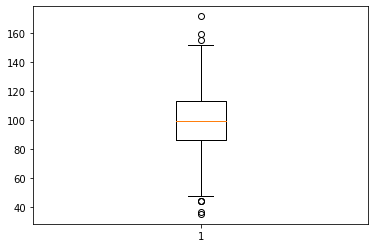

In [69]:
import matplotlib.pyplot as plt

plt.boxplot(data)

**기술통계량 계산 함수 : describe()**

In [73]:
# scipy의 describe
describe(data)
describe(df['english']) # 표본 데이터의 기술 통계량


DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [74]:
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [76]:
describe(df['english'] , ddof=0) # 모집단 데이터에 대한 기술통계량

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

## 모양 통계량
**왜도(SKEWNESS)**
- 데이터의 비대칭정도
- 왜도가 0에 가까운 값을 가지면 분포의 모양은 좌우 대칭
- 왜도가 음수로 나타나면 오른쪽으로 치우친 분포(왼쪽 꼬리 모양)
- 왜도가 양수로 나타나면 왼쪽으로 치우친 분포(오른쪽 꼬리 모양)

**왜도 계산**
- 분포의 비대칭도
- 왜도가 0이면 정규분포
- 왜도의 절대값이 1.5이상이면 많이 치우쳤다고 봄

- scipy.stats.skew()

In [7]:
## 예제 데이터 생성
from matplotlib import pyplot as plt
%matplotlib inline

# 오른쪽으로 꼬리가 긴 분포(right skewed , positive)
x1 = [1]*30+[2]*20+[3]*20+[4]*15+[5]*15

# 좌우대칭 분포
x2 = [1]*15+[2]*20+[3]*30+[4]*20+[5]*15

# 왼쪽으로 꼬리가 긴 분포(left skewed , negative)
x3 = [1]*15+[2]*15+[3]*20+[4]*20+[5]*30

In [8]:
x1[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
pd.Series(x1).value_counts(sort=False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

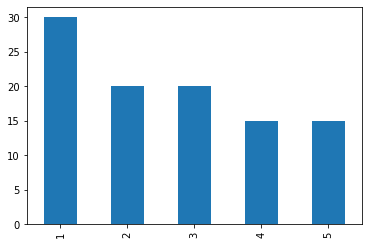

In [10]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar') # kind='bar' : 막대그래프

<AxesSubplot:>

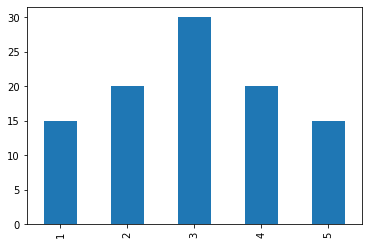

In [11]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar') # kind='bar' : 막대그래프

<AxesSubplot:>

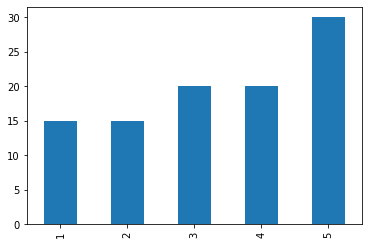

In [12]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar') # kind='bar' : 막대그래프

In [14]:
print('오른쪽으로 꼬리가 긴 분포의 왜도 : ' , skew(x1))
print('좌우대칭 분포의 왜도 : ' , skew(x2))
print('왼쪽으로 꼬리가 긴 분포의 왜도 : ' , skew(x3))

오른쪽으로 꼬리가 긴 분포의 왜도 :  0.3192801008486361
좌우대칭 분포의 왜도 :  0.0
왼쪽으로 꼬리가 긴 분포의 왜도 :  -0.31928010084863606


## 첨도 (kurtosis)

- 데이터의 뾰족한 정도
- 분포가 대표값을 중심으로 얼마나 모여 있는가를 나타내는 척도
- 정규분포(첨도=3)을 기준으로 비교
    - 데이터가 대푯값을 중심으로 상당히 많이 몰려 있다면 분포 가운데 모양이 뾰족한 모양(첨도>3)

**첨도 계산**
- scipy.stats.kurtosis()
    - 정규분포는 0 이 나옴
    - 균일분포에 가까울수록 음수가 나옴

In [15]:
# 균일분포(uniform dist)
x1 = [1]*20+[2]*20+[3]*20+[4]*20+[5]*20

# 좌우대칭 분포 (정규분포와 유사)
x2 = [1]*10+[2]*20+[3]*40+[4]*20+[5]*10

# 뾰족한 분포
x3 = [1]*5+[2]*15+[3]*60+[4]*15+[5]*5

<AxesSubplot:>

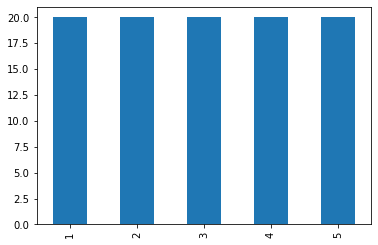

In [16]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar') # 균일 분포

<AxesSubplot:>

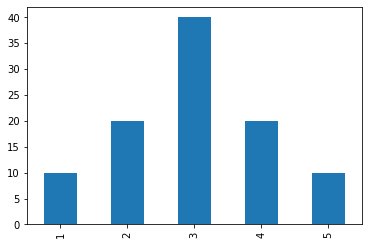

In [17]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar') # 좌우대칭

<AxesSubplot:>

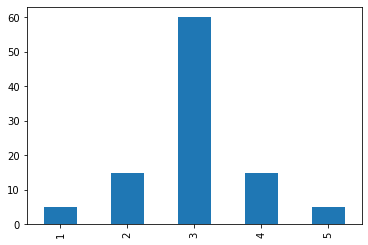

In [18]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar') # 뾰족한 분포

In [17]:
print('평평할때 첨도 : ' , kurtosis(x1))
print('조금 뾰족할 때 첨도 : ' , kurtosis(x2))
print('매우 뾰족한 첨도 : ' , kurtosis(x3))

NameError: name 'x1' is not defined

## 데이터 시각화

https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage

데이터 시각화 참고자료

수치형 데이터
- 일변량
    - 도수분포표 , 상자그림 , 히스토그램
- 이변량
    - 산점도, 선 그래프
- 다변량
    - 산점도 행렬, 방사선 차트 , 평행좌표
    
범주형데이터
- 일변량
    - 빈도표 , 파이차트 , 막대차트
- 이변량
    - 교차표, 스팩트컬럼차트
- 다변량
    - 모자익플롯

In [3]:
df = pd.read_csv('C:/Users/hspar/Desktop/HS_Park/멀티캠퍼스/data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [36]:
# 50명의 영어 점수 array
eng = df['english']

eng.describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [38]:
freq , a = np.histogram(eng , bins = 10 , range = (0,100))  # bins : 구간 , range : 범위  , freq(빈도)만 받음
freq # 빈도
a # 도수

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [9]:
# 0~ 10 , 10~ 20 ,.... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

# freq_class 를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency' : freq} ,
                          index = pd.Index(freq_class , name = 'class'))

freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


**계급값**
- 각 계급을 대표하는 값으로 계급의 중앙값이 이용

In [12]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

**상대도수**
- 전체 데이터에 대해서 해당 계급의 데이터가 어느정도 비율을 차지하고 있는지를 나타냄

In [13]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

**누적 상대도수**

- 해당 계급까지의 상대도수의 합
- 누적합 : np.cumsum()

In [14]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [18]:
# 도수 분포표 확장
freq_dist_df['class value'] = class_value
freq_dist_df['relative freq'] = rel_freq
freq_dist_df['cum. relative freq'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative freq,cum. relative freq
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


도수 분포표 예제

In [19]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
dataframe


,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [21]:
series = dataframe.idxmax()
series

# 가장 높은 값을 갖고 있는 index를 나타냄

Attendance        1
Obtained Marks    0
dtype: int64

In [22]:
series = dataframe.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

**도수 분포표 최빈 값**

In [26]:
fre_dist_df['frequency'].idxmax()


'60~70'

In [27]:
freq_dist_df.loc[fre_dist_df['frequency'].idxmax() , 'class value']

65

**백분위수 및 사분위수 계산**

In [28]:
x = np.arange(1,12 ,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [32]:
print(np.percentile(x , 10)) # 백분위수
print(np.quantile(x , 0.1))  # 0~1 사이의 값 입력

2.0
2.0


In [33]:
print(np.percentile(x , 25)) # 25%
print(np.quantile(x , 0.25))  # 4 사분위수

3.5
3.5


## 히스토그램

In [34]:
import matplotlib.pyplot as plt

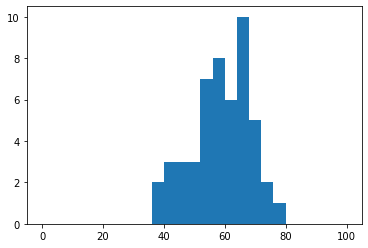

In [36]:
plt.hist(eng , bins=25 , range=(0,100))
plt.show()

## 상자그림

In [39]:
plt.boxplot(eng, labels = ['english'])
plt.show()

NameError: name 'plt' is not defined

# 2차원 데이터 정리

## 두 데이터 사이의 관계를 나타내느 지표

**두 변수 사이의 관계 측도**
- 수치형 변수간의 관계 : 피어슨 사오간계수
- 순서형 변수간의 관계 : Kendall's tau, Spearman correlation
- 범주형 변수간의 관계 : 카이제곱검정 - Chi correlation

In [2]:
df = pd.read_csv('C:/Users/hspar/Desktop/HS_Park/멀티캠퍼스/data/ch2_scores_em.csv' ,
                index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


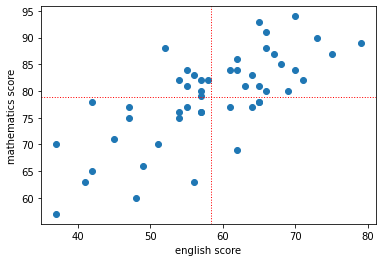

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.axvline(x=df['english'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.show()


## 공분산
- 교재 p.74
- 두 변수 사이의 관계성 척도


In [6]:
# 각 과목의 편차 및 과목간 공분산

summary_df = df.copy()
summary_df['eng_dev.'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev.'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['productOfDev.'] =\
    summary_df['eng_dev.'] * summary_df['math_dev.']
summary_df.head()


,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [8]:
summary_df['productOfDev.'].mean()
# 각 학생별 영어와 수학의 공분산 평균이 58.486 이므로 영어와 수학은 양의 상관관계

58.486

**numpy의 공분산 함수 : cov(data1, data2 , ddof= )**
- 반환값 : 공분산 행렬
- 반환 행렬 중 [0,1] 과 [1,0]의 원소가 공분산 값

In [10]:
cov_mat = np.cov(df['english'] , df['mathematics'], ddof=0)
cov_mat

array([[94.116, 58.486],
       [58.486, 69.386]])

In [11]:
cov_mat[0,1] , cov_mat[1,0]

(58.4856, 58.4856)

In [12]:
cov_mat[0,0] # 영어 과목의 분산

94.1156

In [13]:
cov_mat[1,1] # 수학 과목의 분산

69.3856

In [15]:
np.var(df['english'] , ddof=0) , np.var(df['mathematics'] , ddof= 0 )

(94.116, 69.386)

**상관계수**
- 공분산은 단위의 제곱으로 표현되어 직관적으로 이해하기 어려움
- 상관계수는 단위에 의존하지 않는 상관성을 나타내는 지표
- 양의 상관은 1에 가까워지고, 음의 상관은 -1에 가까워지고 무상관은 0

In [16]:
# 수식으로 상관계수 계산
np.cov(df['english'], df['mathematics'], ddof=0)[0, 1] /\
    (np.std(df['english']) * np.std(df['mathematics']))


0.7237414863069244

**상관계수 함수(np.corrcoef(x,y) / df.corr())**

In [17]:
np.corrcoef(df['english'] , df['mathematics'])

array([[1.   , 0.724],
       [0.724, 1.   ]])

In [18]:
# pandas.DataFrame.corr() 함수 적용
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


## 2차원 데이터의 시각화

**산점도**

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

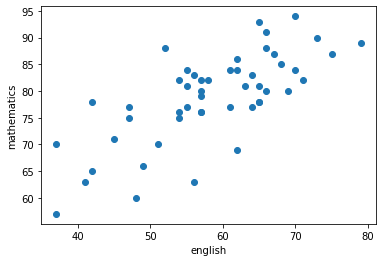

In [22]:
plt.scatter(df['english'],df['mathematics'] )
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()


**회귀직선**

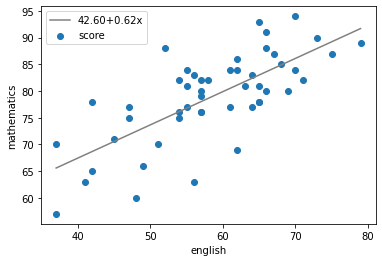

In [24]:
# 계수β_0와β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'],df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'],df['mathematics'], label='score')
plt.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')

plt.show()


**히트맵**

- 히스토그램의 2차원 버전으로 색을 이용해 표현하는 그래프
- 영어 점수 35점부터 80점, 수학 점수 55점부터 95점까지 5점 간격
- 교재 p.83

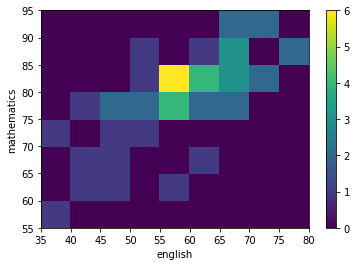

In [32]:
c= plt.hist2d(df['english'] , df['mathematics'], bins = (9,8) , range=[(35,80) , (55,95)])
c[3]

plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks(c[1])
plt.yticks(c[2])

plt.colorbar(c[3])
plt.show()
